Classification Error (Training Set): 0.00%
Classification Error (Test Set): 3.76%

Using Gini Impurity:
Classification Error (Training Set): 0.00%
Classification Error (Test Set): 4.05%


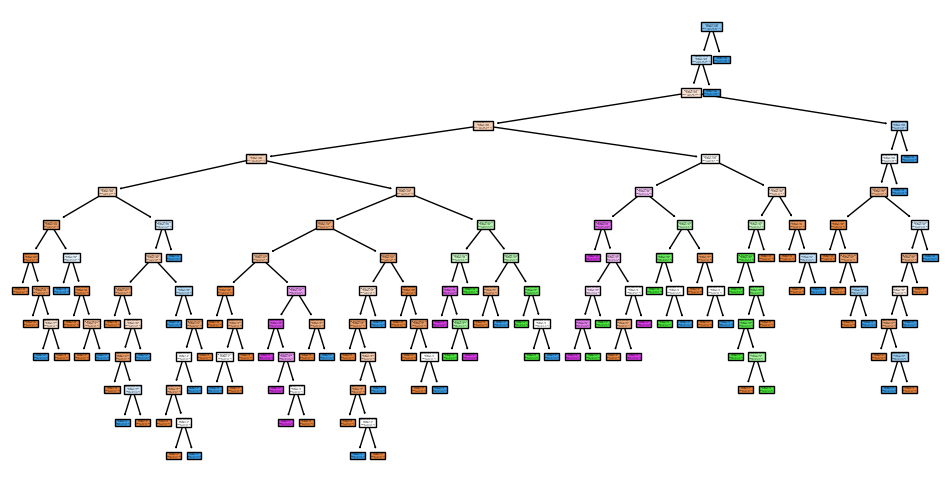

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the Car Evaluation dataset
data = pd.read_csv("C:\\Users\\budal\\Downloads\\car+evaluation\\car.data",
                   names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'acceptability'])

# Preprocessing: Convert categorical attributes to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

# Split the dataset into features (X) and target (y)
X = data.drop('acceptability', axis=1)
y = data['acceptability']

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a decision tree classifier using Information Gain
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

# Predict on the training set
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test set
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Report classification errors
print(f"Classification Error (Training Set): {1 - train_accuracy:.2%}")
print(f"Classification Error (Test Set): {1 - test_accuracy:.2%}")

# Pruning: Decision tree pruning can be done using post-pruning or max depth setting
# In scikit-learn, post-pruning is not directly supported

# Repeat using Gini impurity criterion
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

y_train_pred_gini = clf_gini.predict(X_train)
train_accuracy_gini = accuracy_score(y_train, y_train_pred_gini)

y_test_pred_gini = clf_gini.predict(X_test)
test_accuracy_gini = accuracy_score(y_test, y_test_pred_gini)

# Report classification errors with Gini impurity
print("\nUsing Gini Impurity:")
print(f"Classification Error (Training Set): {1 - train_accuracy_gini:.2%}")
print(f"Classification Error (Test Set): {1 - test_accuracy_gini:.2%}")

# Visualize the decision tree
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=clf.classes_.tolist())
plt.show()
